In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases' '/breast-cancer-wisconsin/wdbc.data', header=None)

In [5]:
from sklearn.preprocessing import LabelEncoder
X=df.iloc[:,2:].values
y=df.iloc[:,1].values
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [6]:
le.transform(['B', 'M'])

array([0, 1])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression())
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
test_acc=pipe.score(X_test,y_test)
print('accuracy score  :' ,  test_acc )

accuracy score  : 0.956140350877193


In [26]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10).split(X_train,y_train)
scores=[]
for k,(train,test) in enumerate(kfold):
    pipe.fit(X_train[train],y_train[train])
    score=pipe.score(X_train[test],y_train[test])
    scores.append(score)
    print(f'Fold: {k+1:02d}, ' f'Class distr.: {np.bincount(y_train[train])}, ' f'Acc.: {score:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956


In [27]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy: 0.950 +/- 0.014


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe,X=X_train,y=y_train,cv=10,n_jobs=1)
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [30]:
print(f'CV accuracy: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

CV accuracy: 0.950 +/- 0.014


(0.8, 1.03)

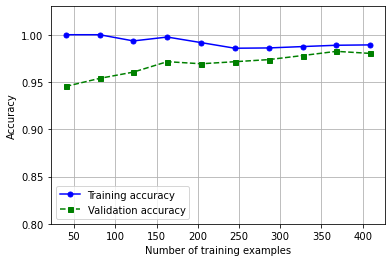

In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',max_iter=10000))
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
#plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
#plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.ylim([0.8, 1.03])


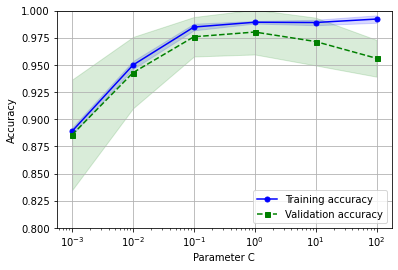

In [35]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',param_range=param_range,cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
'svc__kernel': ['linear']},
{'svc__C': param_range,
'svc__gamma': param_range,
'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,refit=True,n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [37]:
print(gs.best_score_)

0.9846859903381642


In [38]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [39]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


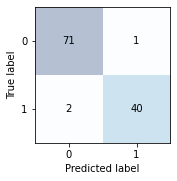

In [56]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
     for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j],va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
np.vstack()